In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from tqdm import tqdm


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

---

----

## Population Growth models

In [3]:
def malthus(x,t,params):
    N = x[0]
    dNdt = params['r']*N
    return [dNdt]

def logistic(x,t,params):
    N = x[0]
    d = params['d_0'] + params['c']*N
    b = params['b_0'] - params['a']*N
    dNdt = (b - d)*N
    return [dNdt]

def logistic_with_allee(x,t,params):
    N = x[0]
    dNdt = params['r']*N*(1 - N/params['k'])*(N-params['N_c'])
    return [dNdt]

def logistic_exp_birth(x,t,params):
    N = x[0]
    d = params['d_0'] + params['c']*N
    b = params['b_0']*np.exp(-params['a']*N)
    dNdt = (b - d)*N
    return [dNdt]

def logistic_cases_birth(x,t,params):
    N = x[0]
    d = params['d_0'] + params['c']*N
    if N <= params['b_0']/params['a']:
        b = params['b_0'] - params['a']*N
    else:
        b = 0
    dNdt = (b - d)*N
    return [dNdt]

In [26]:
params = {}
params['r'] = 0.01
params['k'] = 100
params['N_c'] = 5
params['d_0'] = 0.1
params['c'] = 0.0002
params['b_0'] = 0.25
params['a'] = 0.0001

N0 = 6
t = np.linspace(0, 100, 1000)

In [27]:
y = odeint(logistic_with_allee, N0, t, args = (params,))
# y2 = odeint(logistic_exp_birth, N0, t, args = (params,))
# y3 = odeint(logistic_cases_birth, N0, t, args = (params,))

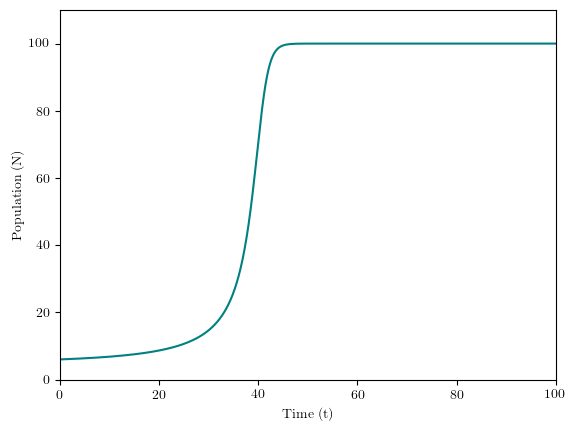

In [30]:
fig, ax = plt.subplots()
plt.plot(t, y[:,0], color = 'teal')
# plt.plot(t, y2[:,0], ls = '--', color = 'crimson', label = r'$b = b_0 e^{-b_1 N}$')
# plt.plot(t, y3[:,0], ls = 'dotted', color = 'darkorange',
         # label = r'$b = b_0 - b_1 N$ if $N \leq b_0/b_1$ and $0$ if $N > b_0/b_1$')
# plt.legend(loc = 'lower right')
plt.xlabel('Time (t)')
plt.ylabel('Population (N)')
plt.xlim(t[0], t[-1])
plt.ylim(0, 1.1*max(y[:,0]))
# fig.text(0.5, 0.92, r'$\displaystyle \frac{\mathrm{d} N}{\mathrm{d} t} = [b - (d_0 + cN)]N$',
#         fontsize = 12, ha = 'center')
plt.show()

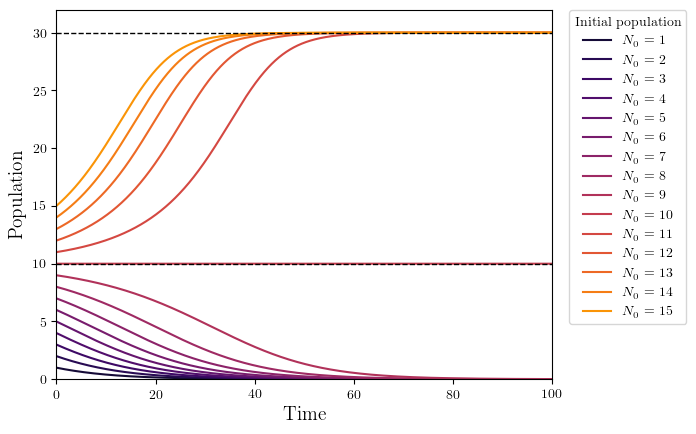

In [46]:
for i in range(1,16):
    params = {}
    params['r'] = 0.01
    params['k'] = 30
    params['N_c'] = 10
    t = np.linspace(0, 200, 10000)
    N0 = i
    y = odeint(logistic_with_allee, N0, t, args = (params,))
    plt.plot(t, y[:,0], color = sns.color_palette('inferno', 20)[i], label = f"$N_0$ = {i}")

plt.axhline(params['k'], lw = 1, ls = '--', color = 'black')
plt.axhline(params['N_c'], lw = 1, ls = '--', color = 'black')
plt.xlim(0, 100)
plt.ylim(0, 32)
plt.legend(title = 'Initial population', bbox_to_anchor = (1.02, 0.13))
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.show()

---

## Interaction between species

### Lotka-Volterra competition

\begin{align}
    & \frac{\mathrm{d}N_1}{\mathrm{d}t} = r_1 N_1 \left( \frac{k_1 - N_1 - \alpha N_2}{k_1} \right) \\
    & \frac{\mathrm{d}N_2}{\mathrm{d}t} = r_2 N_2 \left( \frac{k_2 - N_2 - \beta N_1}{k_2} \right)
\end{align}

In [110]:
def L_V_competition(x,t,params):
    N1 = x[0]
    N2 = x[1]
    dN1dt = params['r1']*N1*((params['k1'] - N1 - params['alpha']*N2)/params['k1'])
    dN2dt = params['r2']*N2*((params['k2'] - N2 - params['beta']*N1)/params['k2'])
    return [dN1dt, dN2dt]

In [111]:
params = {}
params['r1'] = 0.1
params['r2'] = 0.2
params['k1'] = 100
params['k2'] = 80
params['alpha'] = 0.5
params['beta'] = 0.7

N1_0 = 10
N2_0 = 2

init = [N1_0, N2_0]

t = np.linspace(0, 200, 1000)

In [112]:
y = odeint(L_V_competition, init, t, args = (params,))

In [113]:
N1 = y[:,0]
N2 = y[:,1]

In [114]:
print(f"Fixed point for N2: {(params['k2'] - params['beta']*params['k1'])/(1 - params['beta']*params['alpha'])}")
print(f"Fixed point for N1: {(params['k1'] - params['alpha']*params['k2'])/(1 - params['beta']*params['alpha'])}")

Fixed point for N2: 15.384615384615383
Fixed point for N1: 92.3076923076923


In [115]:
fixed_N1 = (params['k1'] - params['alpha']*params['k2'])/(1 - params['beta']*params['alpha'])
fixed_N2 = (params['k2'] - params['beta']*params['k1'])/(1 - params['beta']*params['alpha'])

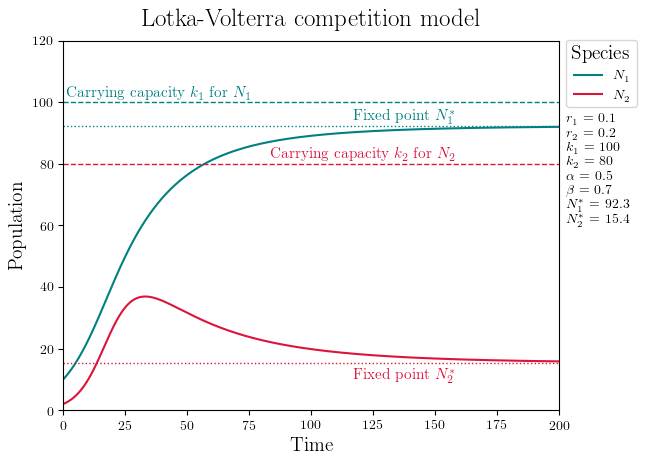

In [134]:
fig, ax = plt.subplots()
plt.plot(t, N1, color = 'teal', label = r'$N_1$')
plt.plot(t, N2, color = 'crimson', label = r'$N_2$')
plt.axhline(params['k1'], ls = '--', color = 'teal', lw = 1)
plt.axhline(params['k2'], ls = '--', color = 'crimson', lw = 1)
plt.axhline(fixed_N2,
           color = 'crimson', ls = 'dotted', lw = 1)
plt.axhline(fixed_N1, color = 'teal', ls = 'dotted', lw = 1)
lgd = plt.legend(title = "Species", bbox_to_anchor=(1,1.02))
lgd.get_title().set_fontsize(14)
plt.xlim(t[0], t[-1])
plt.ylim(0, 120)
plt.text(1, params['k1']+2, r'Carrying capacity $k_1$ for $N_1$', color = 'teal',
        fontsize = 11)
plt.text(158, params['k2']+2, r'Carrying capacity $k_2$ for $N_2$', color = 'crimson',
        ha = 'right', fontsize = 11)
plt.text(158, fixed_N1+2, r'Fixed point $N_1^*$', color = 'teal', fontsize = 11, ha = 'right')
plt.text(158, fixed_N2-5, r'Fixed point $N_2^*$', color = 'crimson', fontsize = 11, ha = 'right')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Lotka-Volterra competition model', fontsize = 18, pad = 10)
fig.text(0.91, 0.5, f'$r_1$ = {params["r1"]}' '\n' f'$r_2$ = {params["r2"]}' '\n' f'$k_1$ = {params["k1"]}'
        '\n' f'$k_2$ = {params["k2"]}' '\n' fr'$\alpha$ = {params["alpha"]}' '\n'
         fr'$\beta$ = {params["beta"]}' '\n' fr'$N_1^*$ = {fixed_N1:.1f}' '\n' fr'$N_2^*$ = {fixed_N2:.1f}')
# fig.patch.set_color('grey')
# for ax in fig.axes:
#     ax.patch.set_color('lightgrey')
# plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')
plt.show()

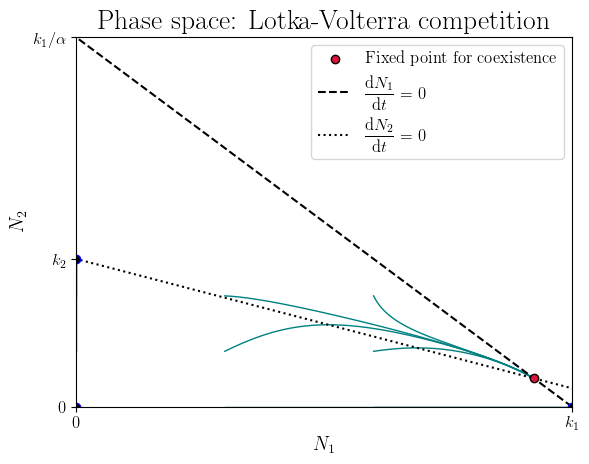

In [135]:
size = 3
for i in range(size):
    for j in range(size):
        N1_0 = 30*j
        N2_0 = 30*i

        init = [N1_0, N2_0]

        t = np.linspace(0, 200, 1000)

        y = odeint(L_V_competition, init, t, args = (params,))

        N1 = y[:,0]
        N2 = y[:,1]
        plt.plot(N1, N2, color = 'teal', zorder = 0, lw = 1)

plt.scatter(fixed_N1, fixed_N2, facecolor = 'crimson', edgecolor = 'black', zorder = 2,
           label = 'Fixed point for coexistence')
plt.plot([params['k1'], 0], [0, params['k1']/params['alpha']], color = 'black',
         ls = '--', lw = 1.5, label = r'$\displaystyle \frac{\mathrm{d} N_1}{\mathrm{d} t} = 0$',
        zorder = 0)
plt.plot([params['k2']/params['beta'], 0], [0, params['k2']], color = 'black',
         ls = 'dotted', label = r'$\displaystyle \frac{\mathrm{d} N_2}{\mathrm{d} t} = 0$',
        zorder = 0)
plt.xlabel(r'$N_1$', fontsize = 14)
plt.ylabel(r"$N_2$", fontsize = 14)
plt.title('Phase space: Lotka-Volterra competition', fontsize = 20)
plt.xticks([0, params['k1'], params['k2']/params['beta']], labels = ['0', r'$k_1$', r'$k_2/\beta$'],
          fontsize = 12)
plt.yticks([0, params['k2'], params['k1']/params['alpha']], labels = ['0', r'$k_2$', r'$k_1/\alpha$'],
          fontsize = 12)
plt.scatter([0, params['k1'], 0], [0, 0, params['k2']], edgecolor = 'blue', facecolor = 'black')
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlim(0, params['k1'])
plt.ylim(0, params['k1']/params['alpha'])
plt.show()

100%|██████████| 300/300 [00:09<00:00, 33.02it/s]


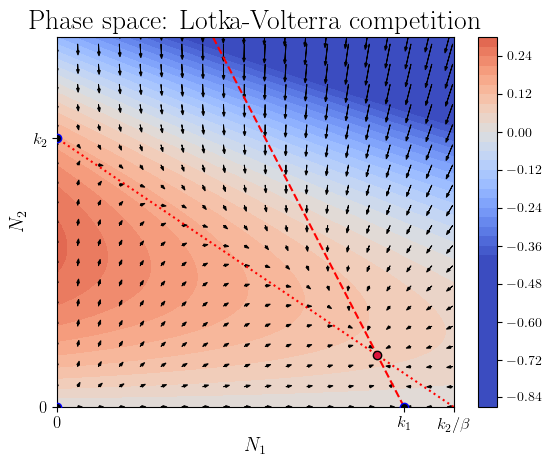

In [120]:
size = 30

fig, ax = plt.subplots()

for i in tqdm(range(size)):
    for j in range(size):
        N1_0 = 6*j
        N2_0 = 6*i

        init = [N1_0, N2_0]

        t = np.linspace(0, 1, 5)

        y = odeint(L_V_competition, init, t[:2], args = (params,))

        N1 = y[:,0]
        N2 = y[:,1]
        plt.arrow(N1[0], N2[0], N1[-1]-N1[0], N2[-1]-N2[0], color = 'black', zorder = 1, lw = 0.7,
                 head_width = 0.8)

        
x = np.linspace(0, params['k2']/params['beta'], 300)
y = np.linspace(0, 1.1*params['k1'], 300)

diff_map = np.zeros((len(x), len(y)))

for i in tqdm(range(len(x))):
    for j in range(len(y)):
        N1_0 = x[i]
        N2_0 = y[j]

        init = [N1_0, N2_0]

        t = np.linspace(0, 1, 10)

        sol = odeint(L_V_competition, init, t[:2], args = (params,))

        N1 = sol[:,0]
        N2 = sol[:,1]
        diff_map[i,j] = (N1[-1]-N1[0])
        
X, Y = np.meshgrid(x, y)
img = plt.contourf(X, Y, diff_map, cmap = 'coolwarm', zorder = 0, levels = 41, vmax = 0.4,
                   vmin = -0.4)
plt.colorbar(img, ax = ax)

plt.scatter(fixed_N1, fixed_N2, facecolor = 'crimson', edgecolor = 'black', zorder = 4,
           label = 'Fixed point for coexistence')
plt.plot([params['k1'], 0], [0, params['k1']/params['alpha']], color = 'red',
         ls = '--', lw = 1.5, label = r'$\displaystyle \frac{\mathrm{d} N_1}{\mathrm{d} t} = 0$',
        zorder = 2)
plt.plot([params['k2']/params['beta'], 0], [0, params['k2']], color = 'red',
         ls = 'dotted', label = r'$\displaystyle \frac{\mathrm{d} N_2}{\mathrm{d} t} = 0$',
        zorder = 2)
plt.xlabel(r'$N_1$', fontsize = 14)
plt.ylabel(r"$N_2$", fontsize = 14)
plt.title('Phase space: Lotka-Volterra competition', fontsize = 20)
plt.xticks([0, params['k1'], params['k2']/params['beta']], labels = ['0', r'$k_1$', r'$k_2/\beta$'],
          fontsize = 12)
plt.yticks([0, params['k2'], params['k1']/params['alpha']], labels = ['0', r'$k_2$', r'$k_1/\alpha$'],
          fontsize = 12)
plt.scatter([0, params['k1'], 0], [0, 0, params['k2']], edgecolor = 'blue', facecolor = 'black',
           zorder = 3)
# plt.legend(fontsize = 12, bbox_to_anchor = (1.02, 0.65))
plt.xlim(0, params['k2']/params['beta'])
plt.ylim(0, 1.1*params['k1'])
plt.show()

In [63]:
for i in tqdm(range(len(N1))):
    if i % 10 == 0:
        fig, ax = plt.subplots(1, 2, figsize = (10,5))
        ax[0].plot(t[:i], N1[:i], color = 'teal', label = r'$N_1$')
        ax[0].plot(t[:i], N2[:i], color = 'crimson', label = r'$N_2$')
        ax[0].axhline(params['k1'], ls = '--', color = 'teal', lw = 1)
        ax[0].axhline(params['k2'], ls = '--', color = 'crimson', lw = 1)
        ax[0].axhline(fixed_N2,
                   color = 'crimson', ls = 'dotted', lw = 1)
        ax[0].axhline(fixed_N1, color = 'teal', ls = 'dotted', lw = 1)
        lgd = ax[0].legend(title = "Species", loc = 'upper center', ncol = 2)
        lgd.get_title().set_fontsize(12)
        ax[0].set_xlim(t[0], t[-1])
        ax[0].set_ylim(0, 125)
        ax[0].text(1, params['k1']+2, r'Carrying capacity $k_1$ for $N_1$', color = 'teal',
                fontsize = 11)
        ax[0].text(188, params['k2']+2, r'Carrying capacity $k_2$ for $N_2$', color = 'crimson',
                ha = 'right', fontsize = 11)
        ax[0].text(188, fixed_N1+2, r'Fixed point $N_1^*$', color = 'teal', fontsize = 11, ha = 'right')
        # ax[0].text(158, fixed_N2-5, r'Fixed point $N_2^*$', color = 'crimson', fontsize = 11, ha = 'right')
        ax[0].set_xlabel('Time', fontsize = 14)
        ax[0].set_ylabel('Population', fontsize = 14)
        ax[0].set_title('Solutions', fontsize = 16)

        # fig.patch.set_color('grey')
        # for ax in fig.axes:
        #     ax.patch.set_color('lightgrey')
        # plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')

        ax[1].plot(N1[:i], N2[:i], color = 'darkorange', zorder = 0, lw = 2)

        if fixed_N1 < 0:
            plt.scatter(0, fixed_N2, facecolor = 'crimson', edgecolor = 'black', zorder = 2,
                       label = 'Fixed point for coexistence')
        elif fixed_N2 < 0:
            plt.scatter(fixed_N1, 0, facecolor = 'crimson', edgecolor = 'black', zorder = 2,
                       label = 'Fixed point for coexistence')
        else:
            plt.scatter(fixed_N1, fixed_N2, facecolor = 'crimson', edgecolor = 'black', zorder = 2,
                       label = 'Fixed point for coexistence')
        plt.plot([params['k1'], 0], [0, params['k1']/params['alpha']], color = 'black',
                 ls = '--', lw = 1.5, label = r'$\displaystyle \frac{\mathrm{d} N_1}{\mathrm{d} t} = 0$',
                 zorder = 0)
        plt.plot([params['k2']/params['beta'], 0], [0, params['k2']], color = 'black',
                 ls = 'dotted', label = r'$\displaystyle \frac{\mathrm{d} N_2}{\mathrm{d} t} = 0$',
                zorder = 0)
        plt.xlabel(r'$N_1$', fontsize = 14)
        plt.ylabel(r"$N_2$", fontsize = 14)
        plt.title('Phase space', fontsize = 16)
        plt.legend(loc = 'upper right', fontsize = 10)
        plt.xlim(0, 200)
        plt.ylim(0, 100)
        fig.text(0.5, 0.95, 'Lotka-Volterra competition model', fontsize = 18, ha = 'center')
        plt.savefig(f'Plots/Gif/Lotka-Volterra_competition_{i}.png', dpi = 300, bbox_inches = 'tight')
        plt.close()
# plt.show()

100%|██████████| 1000/1000 [01:05<00:00, 15.24it/s]


### Lotka-Volterra predation

We are going to build the [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) model for predation. Consider a population of predators $P(t)$ and a population of prey $V(t)$. Assume that following:

- The predator is a specialized predator, so it only feeds on this prey.
- The only regulator for the prey population is the top-down effect of the predator.
- Predators also do not interfer on each other.
- The effect of the predators in the prey is proportional to the number of predators and a response function $f(P,V)$.

\begin{align}
    & \frac{\mathrm{d}V}{\mathrm{d}t} = rV - P \overbrace{f(P,V)}^{\text{Functional response}}\\
    & \frac{\mathrm{d}P}{\mathrm{d}t} = \underbrace{\chi P f(P,V)}_{\text{Numerical response}} - \mu P
\end{align}

The numerical response is just a fraction of the functional response. That is, the effect of the prey in the increase of predators is only a fraction of the effect of decrease in prey due to predation. That means that the rate of increase in the predator population is smaller than the rate of decrease in the prey population.

For a start, let's assume $f(P,V) = \alpha V$ (Holling type functional response). Assuming this, we are stating that the growth of the predator population is proportional to the number of prey. Basically we are saying that the predator has no saciation.

Before we solve it numerically, we can find the fixed points where $\mathrm{d} V / \mathrm{d} t = \mathrm{d} P / \mathrm{d} t = 0$.

\begin{align}
    & r V - \alpha P V = 0 \Rightarrow P = \frac{r}{\alpha}\\
    & \chi \alpha P V - \mu P = 0 \Rightarrow V = \frac{\mu}{\alpha \chi}
\end{align}

In [8]:
def L_V_predator(x,t,params):
    V = x[0]
    P = x[1]
    f = params['alpha']*V
    dVdt = params['r']*V - P*f
    dPdt = params['chi']*P*f - params['mu']*P
    return [dVdt, dPdt]

In [106]:
params = {}
params['alpha'] = 0.3
params['r'] = 0.2
params['chi'] = 0.4
params['mu'] = 0.1

V_0 = 5
P_0 = 3

init = [V_0, P_0]

t = np.linspace(0, 200, 1000)

In [107]:
y = odeint(L_V_predator, init, t, args = (params,))

In [108]:
V = y[:,0]
P = y[:,1]

Conserved quantity: $\chi \alpha V - \mu \ln(V) + \alpha P - r \ln(P)$

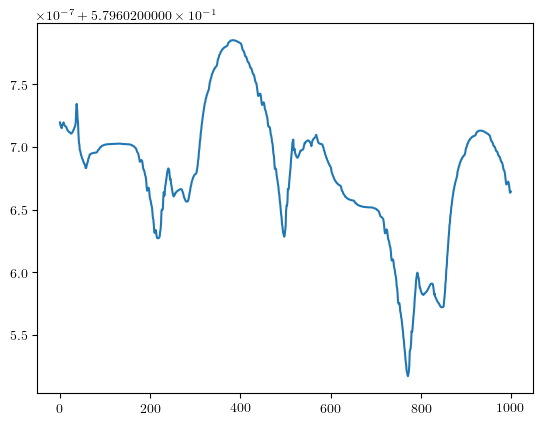

In [92]:
plt.plot(params['chi']*params['alpha']*V - params['mu']*np.log(V) + params['alpha']*P - params['r']*np.log(P))
plt.show()

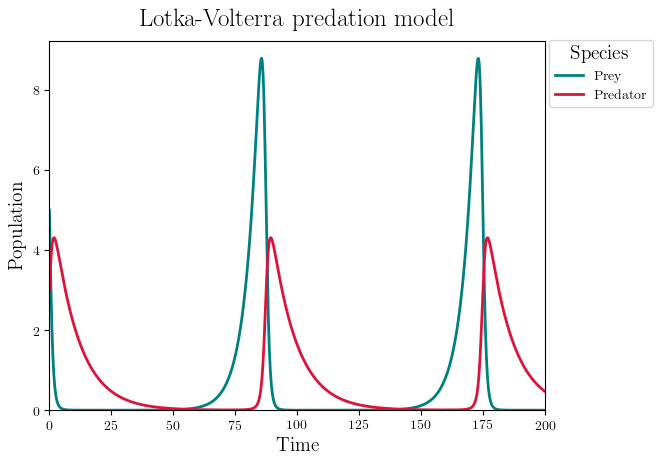

In [109]:
fig, ax = plt.subplots()
plt.plot(t, V, color = 'teal', label = r'Prey', lw = 2)
plt.plot(t, P, color = 'crimson', label = r'Predator', lw = 2)
# plt.axhline(params['mu']/(params['alpha']*params['chi']), ls = '--', color = 'teal', lw = 1)
# plt.axhline(params['r']/params['alpha'], ls = '--', color = 'crimson', lw = 1)
# plt.axhline(fixed_N2,
#            color = 'crimson', ls = 'dotted', lw = 1)
# plt.axhline(fixed_N1, color = 'teal', ls = 'dotted', lw = 1)
lgd = plt.legend(title = "Species", bbox_to_anchor = (1.23, 1.02))
lgd.get_title().set_fontsize(14)
plt.xlim(t[0], t[-1])
plt.ylim(0, 1.05*np.max(V))
# plt.text(1, params['k1']+2, r'Carrying capacity $k_1$ for $N_1$', color = 'teal',
#         fontsize = 11)
# plt.text(158, params['k2']+2, r'Carrying capacity $k_2$ for $N_2$', color = 'crimson',
#         ha = 'right', fontsize = 11)
# plt.text(158, fixed_N1+2, r'Fixed point $N_1^*$', color = 'teal', fontsize = 11, ha = 'right')
# plt.text(158, fixed_N2-5, r'Fixed point $N_2^*$', color = 'crimson', fontsize = 11, ha = 'right')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Lotka-Volterra predation model', fontsize = 18, pad = 10)
# fig.text(0.91, 0.5, f'$r_1$ = {params["r1"]}' '\n' f'$r_2$ = {params["r2"]}' '\n' f'$k_1$ = {params["k1"]}'
#         '\n' f'$k_2$ = {params["k2"]}' '\n' fr'$\alpha$ = {params["alpha"]}' '\n'
#          fr'$\beta$ = {params["beta"]}' '\n' fr'$N_1^*$ = {fixed_N1:.1f}' '\n' fr'$N_2^*$ = {fixed_N2:.1f}')
# fig.patch.set_color('grey')
# for ax in fig.axes:
#     ax.patch.set_color('lightgrey')
# plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')
plt.show()

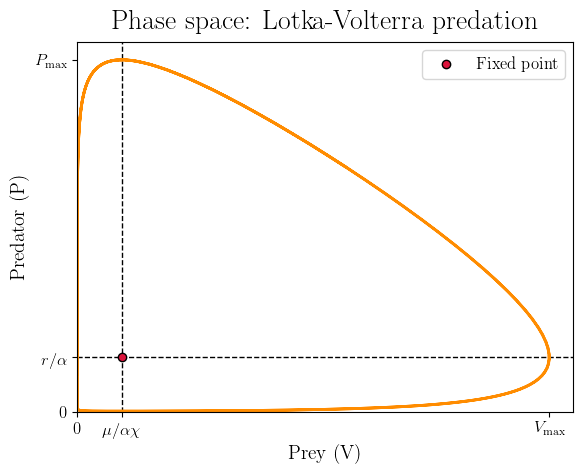

In [110]:
fig, ax = plt.subplots()
plt.plot(V, P, lw = 2, color = 'darkorange')
plt.scatter(params['mu']/(params['alpha']*params['chi']), params['r']/params['alpha'],
           edgecolor = 'black', facecolor = 'crimson', label = 'Fixed point', zorder = 2)
plt.axvline(params['mu']/(params['alpha']*params['chi']), lw = 1, ls = '--', zorder = 0,
           color = 'black')
plt.axhline(params['r']/params['alpha'], lw = 1, ls = '--', zorder = 0,
           color = 'black')
plt.xlabel('Prey (V)', fontsize = 14)
plt.xticks([0, params['mu']/(params['alpha']*params['chi']), np.max(V)],
          labels = ["0", r"$\mu/\alpha \chi$", "$V_{\max}$"], fontsize = 12)
plt.ylabel('Predator (P)', fontsize = 14)
plt.yticks([0, params['r']/params['alpha'], np.max(P)],
          labels = ["0", r"$r/\alpha$", "$P_{\max}$"], fontsize = 12)
plt.xlim(0, 1.05*np.max(V))
plt.ylim(0, 1.05*np.max(P))
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Phase space: Lotka-Volterra predation', fontsize = 20, pad = 10)
plt.show()

In [80]:
for i in tqdm(range(len(V))):
    if i % 10 == 0:
        fig, ax = plt.subplots(1, 2, figsize = (10,5))
        ax[0].plot(t[:i], V[:i], color = 'teal')
        ax[0].scatter(t[i], V[i], facecolor = 'teal', label = 'Prey (V)', edgecolor = 'black')
        ax[0].plot(t[:i], P[:i], color = 'crimson')
        ax[0].scatter(t[i], P[i], facecolor = 'crimson', label = 'Predator (P)', edgecolor = 'black')
        lgd = ax[0].legend(title = "Species", loc = 'upper center', ncol = 2)
        lgd.get_title().set_fontsize(12)
        ax[0].set_xlim(t[0], t[-1])
        ax[0].set_ylim(0, 1.1*np.max(V))
        # ax[0].text(158, fixed_N2-5, r'Fixed point $N_2^*$', color = 'crimson', fontsize = 11, ha = 'right')
        ax[0].set_xlabel('Time', fontsize = 14)
        ax[0].set_ylabel('Population', fontsize = 14)
        ax[0].set_title('Solutions', fontsize = 16)

        # fig.patch.set_color('grey')
        # for ax in fig.axes:
        #     ax.patch.set_color('lightgrey')
        # plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')

        ax[1].plot(V[:i], P[:i], color = 'darkorange', zorder = 0, lw = 2, alpha = 0.6)
        ax[1].scatter(V[i], P[i], facecolor = 'darkorange', zorder = 0, edgecolor = 'black')

        ax[1].scatter(params['mu']/(params['alpha']*params['chi']), params['r']/params['alpha'],
           edgecolor = 'black', facecolor = 'crimson', label = 'Fixed point', zorder = 2)
        ax[1].axvline(params['mu']/(params['alpha']*params['chi']), lw = 1, ls = '--', zorder = 0,
                   color = 'black')
        ax[1].axhline(params['r']/params['alpha'], lw = 1, ls = '--', zorder = 0,
                   color = 'black')
        ax[1].set_xlabel('Prey (V)', fontsize = 14)
        plt.xticks([0, params['mu']/(params['alpha']*params['chi']), np.max(V)],
                  labels = ["0", r"$\mu/\alpha \chi$", "$V_{\max}$"], fontsize = 12)
        ax[1].set_ylabel('Predator (P)', fontsize = 14)
        plt.yticks([0, params['r']/params['alpha'], np.max(P)],
                  labels = ["0", r"$r/\alpha$", "$P_{\max}$"], fontsize = 12)
        ax[1].set_title('Phase space', fontsize = 16)
        ax[1].legend(loc = 'upper right', fontsize = 10)
        ax[1].set_xlim(0, 1.05*np.max(V))
        ax[1].set_ylim(0, 1.05*np.max(P))
        fig.text(0.5, 0.95, 'Lotka-Volterra predation model', fontsize = 18, ha = 'center')
        plt.savefig(f'Plots/Gif/Lotka-Volterra_predation_{i}.png', dpi = 300, bbox_inches = 'tight')
        plt.close()
# plt.show()

100%|██████████| 1000/1000 [01:08<00:00, 14.65it/s]


### Lotka-Volterra predation with carrying capacity

Including now the effects of carying capacity to the growth of the prey populations, we have the equations defined as

\begin{align}
    & \frac{\mathrm{d}V}{\mathrm{d}t} = r V \left( 1 - \frac{V}{k_v} \right) - \alpha P V\\
    & \frac{\mathrm{d}P}{\mathrm{d}t} = \chi \alpha P V - \mu P
\end{align}

Now the fixed points are defined as

\begin{align}
    r V \left( 1 - \frac{V}{k_v} \right) - \alpha P V = r V -  r\frac{V^2}{k_v} - \alpha P V = 0 \Rightarrow P = \frac{r}{\alpha}\left( 1 - \frac{V}{k} \right)
\end{align}

and

\begin{align}
    \chi \alpha P V - \mu P = 0 \Rightarrow V = \frac{\mu}{\chi \alpha}
\end{align}

In [45]:
def L_V_predator_carrying_capacity(x,t,params):
    V = x[0]
    P = x[1]
    f = params['alpha']*V
    dVdt = params['r']*V*(1 - V/params['k_v']) - P*f
    dPdt = params['chi']*P*f - params['mu']*P
    return [dVdt, dPdt]

In [46]:
def null_line(V, r, alpha, k):
    return (r/alpha)*(1 - V/k)

In [47]:
params = {}
params['alpha'] = 0.3
params['r'] = 0.3
params['chi'] = 0.4
params['mu'] = 0.2
params['k_v'] = 7

V_0 = 5
P_0 = 3

init = [V_0, P_0]

t = np.linspace(0, 250, 1000)

In [48]:
y = odeint(L_V_predator_carrying_capacity, init, t, args = (params,))

In [49]:
V = y[:,0]
P = y[:,1]

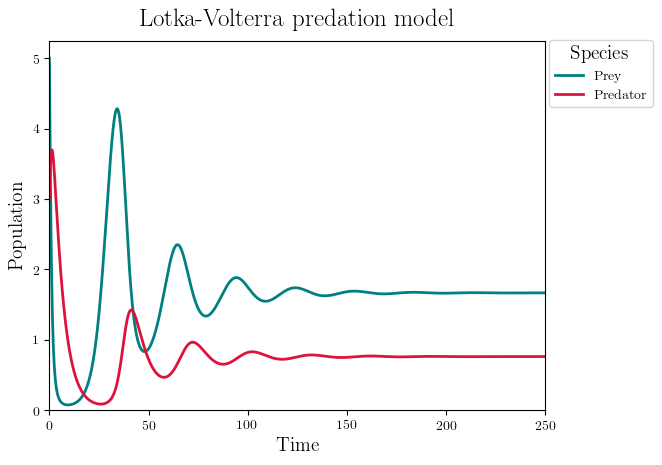

In [50]:
fig, ax = plt.subplots()
plt.plot(t, V, color = 'teal', label = r'Prey', lw = 2)
plt.plot(t, P, color = 'crimson', label = r'Predator', lw = 2)
lgd = plt.legend(title = "Species", bbox_to_anchor = (1.23, 1.02))
lgd.get_title().set_fontsize(14)
plt.xlim(t[0], t[-1])
plt.ylim(0, 1.05*np.max(V))
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Lotka-Volterra predation model', fontsize = 18, pad = 10)

# fig.patch.set_color('grey')
# for ax in fig.axes:
#     ax.patch.set_color('lightgrey')
# plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')
plt.show()

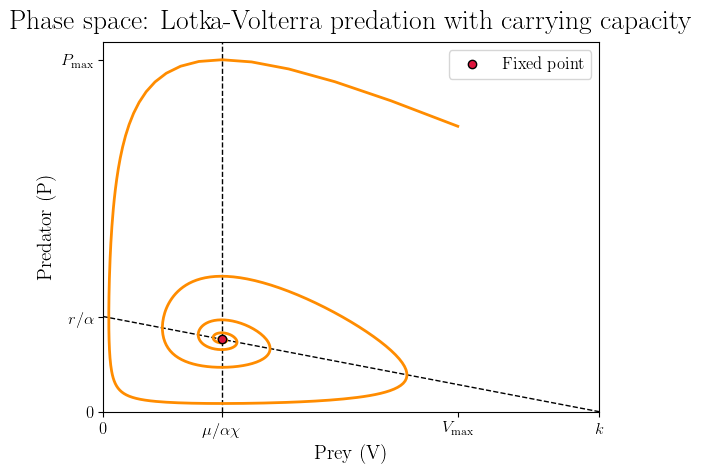

In [51]:
fig, ax = plt.subplots()
plt.plot(V, P, lw = 2, color = 'darkorange')
plt.scatter(params['mu']/(params['alpha']*params['chi']),
            null_line(params['mu']/(params['alpha']*params['chi']), params['r'], params['alpha'], params['k_v']),
           edgecolor = 'black', facecolor = 'crimson', label = 'Fixed point', zorder = 2)
plt.axvline(params['mu']/(params['alpha']*params['chi']), lw = 1, ls = '--', zorder = 0,
           color = 'black')
plt.plot([params['k_v'], 0], [0, params['r']/params['alpha']], lw = 1, ls = '--', zorder = 0,
           color = 'black')
plt.xlabel('Prey (V)', fontsize = 14)
plt.xticks([0, params['mu']/(params['alpha']*params['chi']), np.max(V), params['k_v']],
          labels = ["0", r"$\mu/\alpha \chi$", "$V_{\max}$", r"$k$"], fontsize = 12)
plt.ylabel('Predator (P)', fontsize = 14)
plt.yticks([0, params['r']/params['alpha'], np.max(P)],
          labels = ["0", r"$r/\alpha$", "$P_{\max}$"], fontsize = 12)
plt.xlim(0, params['k_v'])
plt.ylim(0, 1.05*np.max(P))
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Phase space: Lotka-Volterra predation with carrying capacity', fontsize = 20, pad = 10)
plt.show()

In [52]:
for i in tqdm(range(len(V))):
    if i % 10 == 0:
        fig, ax = plt.subplots(1, 2, figsize = (10,5))
        ax[0].plot(t[:i], V[:i], color = 'teal')
        ax[0].scatter(t[i], V[i], facecolor = 'teal', label = 'Prey (V)', edgecolor = 'black')
        ax[0].plot(t[:i], P[:i], color = 'crimson')
        ax[0].scatter(t[i], P[i], facecolor = 'crimson', label = 'Predator (P)', edgecolor = 'black')
        lgd = ax[0].legend(title = "Species", loc = 'upper center', ncol = 2)
        lgd.get_title().set_fontsize(12)
        ax[0].set_xlim(t[0], t[-1])
        ax[0].set_ylim(0, 1.1*np.max(V))
        # ax[0].text(158, fixed_N2-5, r'Fixed point $N_2^*$', color = 'crimson', fontsize = 11, ha = 'right')
        ax[0].set_xlabel('Time', fontsize = 14)
        ax[0].set_ylabel('Population', fontsize = 14)
        ax[0].set_title('Solutions', fontsize = 16)

        # fig.patch.set_color('grey')
        # for ax in fig.axes:
        #     ax.patch.set_color('lightgrey')
        # plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')

        ax[1].plot(V[:i], P[:i], color = 'darkorange', zorder = 0, lw = 2, alpha = 0.6)
        ax[1].scatter(V[i], P[i], facecolor = 'darkorange', zorder = 0, edgecolor = 'black')

        ax[1].scatter(params['mu']/(params['alpha']*params['chi']),
            null_line(params['mu']/(params['alpha']*params['chi']), params['r'], params['alpha'], params['k_v']),
           edgecolor = 'black', facecolor = 'crimson', label = 'Fixed point', zorder = 2)
        ax[1].axvline(params['mu']/(params['alpha']*params['chi']), lw = 1, ls = '--', zorder = 0,
                   color = 'black')
        ax[1].plot([params['k_v'], 0], [0, params['r']/params['alpha']], lw = 1, ls = 'dotted', zorder = 0,
                   color = 'black', label = r'$\frac{\mathrm{d}V}{\mathrm{d}t} = 0$')
        ax[1].set_xlabel('Prey (V)', fontsize = 14)
        plt.xticks([0, params['mu']/(params['alpha']*params['chi']), np.max(V), params['k_v']],
                  labels = ["0", r"$\mu/\alpha \chi$", "$V_{\max}$", r"$k$"], fontsize = 12)
        ax[1].set_ylabel('Predator (P)', fontsize = 14)
        plt.yticks([0, params['r']/params['alpha'], np.max(P)],
                  labels = ["0", r"$r/\alpha$", "$P_{\max}$"], fontsize = 12)
        ax[1].set_xlim(0, params['k_v'])
        ax[1].set_ylim(0, 1.05*np.max(P))
        ax[1].legend(loc = 'upper right', fontsize = 12)
        ax[1].set_title('Phase-Space', fontsize = 16)
        fig.text(0.5, 0.95, 'Lotka-Volterra predation model with carrying capacity', fontsize = 18, ha = 'center')
        plt.savefig(f'Plots/Gif/Lotka-Volterra_predation_with_carrying_capacity_{i}.png',
                    dpi = 300, bbox_inches = 'tight')
        plt.close()
# plt.show()

100%|██████████| 1000/1000 [00:57<00:00, 17.48it/s]


### Rosenzweig-MacArthur model

Now let's change $f(V,P)$. Let us consider that the predator spends some time hunting so it has a handling time with the prey, it is not insaciable and does not hunt constantly. When assuming this we state that

$$ f(V,P) = \frac{\alpha V}{1 + h \alpha V} $$

where $h$ is the handling time per prey. In this sense, the time the predator spents handling prey is $t_h = h n$, with $n$ being the number of prey hunted. With this we arrive at the Rosenzweig-MacArthur equation

\begin{align}
    & \frac{\mathrm{d}V}{\mathrm{d}t} = r V \left( 1 - \frac{V}{k} \right) - \frac{\alpha P V}{1 + \alpha h V} \\
    & \frac{\mathrm{d}P}{\mathrm{d}t} = \frac{\chi \alpha P V}{1 + \alpha h V} - \mu P
\end{align}

we can check that when $h \rightarrow 0$, this equation turns itself into the Lotka-Volterra model with carrying capacity and if also $k \rightarrow \infty$, we recover the usual Lotka-Volterra model.

\begin{align}
    & \overbrace{\frac{\mathrm{d}V}{\mathrm{d}t}}^{\text{rate of change in prey population}} = \overbrace{r V}^{\text{growth}} \underbrace{\left( 1 - \frac{V}{k} \right)}_{\text{carrying capacity}} - \overbrace{\frac{\alpha P V}{1 + \alpha h V}}^{\text{predation with handling time}} \\
    & \overbrace{\frac{\mathrm{d}P}{\mathrm{d}t}}^{\text{rate of change in predator population}} = \underbrace{\frac{\chi \alpha P V}{1 + \alpha h V}}_{\text{hunting with handling time}} - \overbrace{\mu P}^{\text{natural death}}
\end{align}

In [32]:
def rosenzweig_macarthur(x,t,params):
    V = x[0]
    P = x[1]
    f = params['alpha']*V/(1 + params['h']*params['alpha']*V)
    dVdt = params['r']*V*(1 - V/params['k_v']) - P*f
    dPdt = params['chi']*P*f - params['mu']*P
    return [dVdt, dPdt]

In [33]:
params = {}
params['alpha'] = 0.3
params['r'] = 0.2
params['chi'] = 0.4
params['mu'] = 0.2
params['k_v'] = 10
params['h'] = 0.7

V_0 = 4
P_0 = 1.5

init = [V_0, P_0]

t = np.linspace(0, 500, 1000)

In [34]:
y = odeint(rosenzweig_macarthur, init, t, args = (params,))

In [123]:
V = y[:,0]
P = y[:,1]

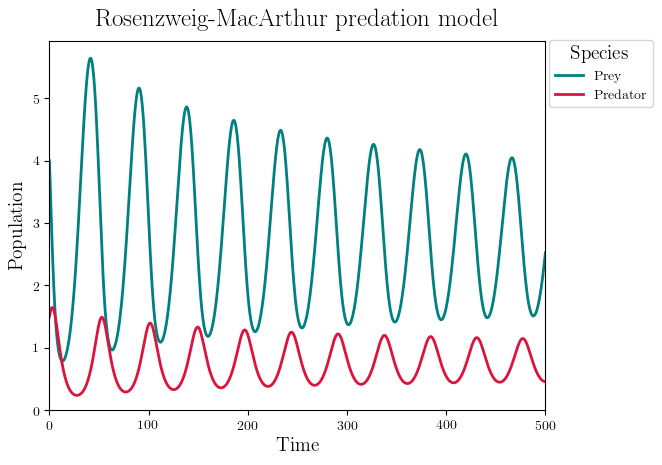

In [124]:
fig, ax = plt.subplots()
plt.plot(t, V, color = 'teal', label = r'Prey', lw = 2)
plt.plot(t, P, color = 'crimson', label = r'Predator', lw = 2)
lgd = plt.legend(title = "Species", bbox_to_anchor = (1.23, 1.02))
lgd.get_title().set_fontsize(14)
plt.xlim(t[0], t[-1])
plt.ylim(0, 1.05*np.max(V))
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Rosenzweig-MacArthur predation model', fontsize = 18, pad = 10)

# fig.patch.set_color('grey')
# for ax in fig.axes:
#     ax.patch.set_color('lightgrey')
# plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [36]:
t = np.linspace(0, 1000, 1000)
y = odeint(rosenzweig_macarthur, init, t, args = (params,))

V_attract = y[953:,0]
P_attract = y[953:,1]

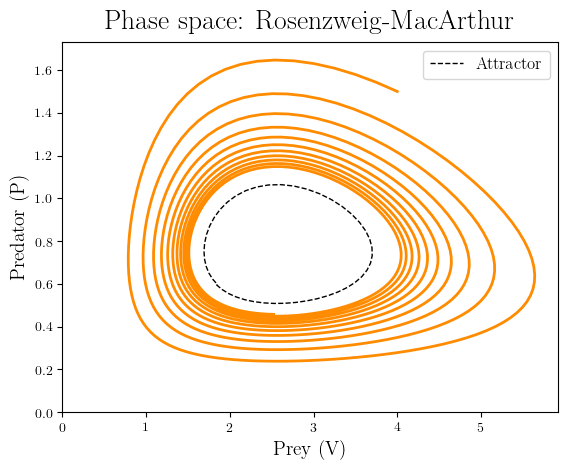

In [126]:
fig, ax = plt.subplots()
plt.plot(V, P, lw = 2, color = 'darkorange')
plt.plot(V_attract, P_attract, lw = 1, color = 'black', ls = '--', label = 'Attractor')
# plt.scatter(params['mu']/(params['alpha']*params['chi']),
#             null_line(params['mu']/(params['alpha']*params['chi']), params['r'], params['alpha'], params['k_v']),
#            edgecolor = 'black', facecolor = 'crimson', label = 'Fixed point', zorder = 2)
# plt.axvline(params['mu']/(params['alpha']*params['chi']), lw = 1, ls = '--', zorder = 0,
#            color = 'black')
# plt.plot([params['k_v'], 0], [0, params['r']/params['alpha']], lw = 1, ls = '--', zorder = 0,
#            color = 'black')
plt.xlabel('Prey (V)', fontsize = 14)
# plt.xticks([0, params['mu']/(params['alpha']*params['chi']), np.max(V), params['k_v']],
#           labels = ["0", r"$\mu/\alpha \chi$", "$V_{\max}$", r"$k$"], fontsize = 12)
plt.ylabel('Predator (P)', fontsize = 14)
# plt.yticks([0, params['r']/params['alpha'], np.max(P)],
#           labels = ["0", r"$r/\alpha$", "$P_{\max}$"], fontsize = 12)
plt.xlim(0, 1.05*np.max(V))
plt.ylim(0, 1.05*np.max(P))
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Phase space: Rosenzweig-MacArthur', fontsize = 20, pad = 10)
plt.show()

In [ ]:
c = mpl.cm.viridis

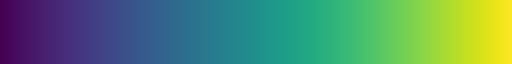

In [60]:
mpl.cm.viridis

100%|██████████| 300/300 [00:12<00:00, 24.04it/s]


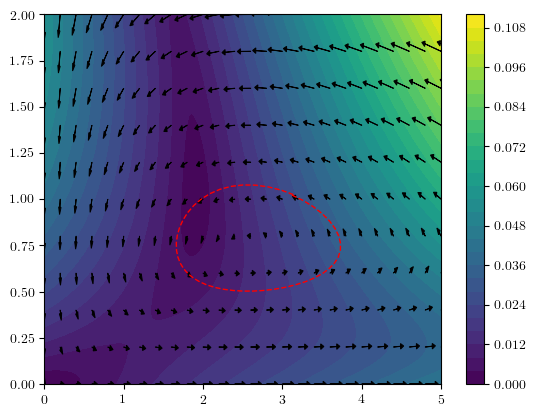

In [78]:
size = 27

fig, ax = plt.subplots()
for i in tqdm(range(size)):
    for j in range(size):
        N1_0 = 0.2*j
        N2_0 = 0.2*i

        init = [N1_0, N2_0]

        t = np.linspace(0, 1, 5)

        y = odeint(rosenzweig_macarthur, init, t[:2], args = (params,))

        N1 = y[:,0]
        N2 = y[:,1]
        plt.arrow(N1[0], N2[0], N1[-1]-N1[0], N2[-1]-N2[0], color = 'black', lw = 0.7,
                 head_width = 0.03, head_length = 0.04, zorder = 1)
        
x = np.linspace(0, 5, 300)
y = np.linspace(0, 2, 300)

diff_map = np.zeros((len(x), len(y)))

for i in tqdm(range(len(x))):
    for j in range(len(y)):
        N1_0 = x[i]
        N2_0 = y[j]

        init = [N1_0, N2_0]

        t = np.linspace(0, 1, 10)

        sol = odeint(rosenzweig_macarthur, init, t[:2], args = (params,))

        N1 = sol[:,0]
        N2 = sol[:,1]
        diff_map[i,j] = np.sqrt((N1[-1]-N1[0])**2 + (N2[-1]-N2[0])**2)

X, Y = np.meshgrid(x, y)
img = plt.contourf(X, Y, diff_map, cmap = 'viridis', zorder = 0, levels = 30)
plt.colorbar(img, ax = ax)
plt.plot(V_attract, P_attract, lw = 1, color = 'red', ls = '--', label = 'Attractor', zorder = 2)

# plt.xlabel(r'$N_1$', fontsize = 14)
# plt.ylabel(r"$N_2$", fontsize = 14)
# plt.title('Phase space: Lotka-Volterra competition', fontsize = 20)
# plt.legend(fontsize = 12, bbox_to_anchor = (1.02, 0.65))
plt.xlim(0, 5)
plt.ylim(0, 2)
plt.show()

In [107]:
for i in tqdm(range(len(V))):
    if i % 10 == 0:
        fig, ax = plt.subplots(1, 2, figsize = (10,5))
        ax[0].plot(t[:i], V[:i], color = 'teal')
        ax[0].scatter(t[i], V[i], facecolor = 'teal', label = 'Prey (V)', edgecolor = 'black')
        ax[0].plot(t[:i], P[:i], color = 'crimson')
        ax[0].scatter(t[i], P[i], facecolor = 'crimson', label = 'Predator (P)', edgecolor = 'black')
        lgd = ax[0].legend(title = "Species", loc = 'upper center', ncol = 2)
        lgd.get_title().set_fontsize(12)
        ax[0].set_xlim(t[0], t[-1])
        ax[0].set_ylim(0, 1.1*np.max(V))
        # ax[0].text(158, fixed_N2-5, r'Fixed point $N_2^*$', color = 'crimson', fontsize = 11, ha = 'right')
        ax[0].set_xlabel('Time', fontsize = 14)
        ax[0].set_ylabel('Population', fontsize = 14)
        ax[0].set_title('Solutions', fontsize = 16)

        # fig.patch.set_color('grey')
        # for ax in fig.axes:
        #     ax.patch.set_color('lightgrey')
        # plt.savefig('Plots/Lotka-Volterra_competition_white_bckg.png', dpi = 300, bbox_inches = 'tight')

        ax[1].plot(V[:i], P[:i], color = 'darkorange', zorder = 0, lw = 2, alpha = 0.6)
        ax[1].scatter(V[i], P[i], facecolor = 'darkorange', zorder = 0, edgecolor = 'black')

        ax[1].plot(V_attract, P_attract, lw = 1, color = 'black', ls = '--', label = 'Attractor')
        ax[1].set_ylabel('Predator (P)', fontsize = 14)
        ax[1].set_xlim(0, 1.05*np.max(V))
        ax[1].set_ylim(0, 1.05*np.max(P))
        ax[1].legend(loc = 'upper right', fontsize = 12)
        ax[1].set_title('Phase-Space', fontsize = 16)
        fig.text(0.5, 0.95, 'Rosenzweig-MacArthur predation model', fontsize = 18, ha = 'center')
        plt.savefig(f'Plots/Gif/Rosenzweig-MacArthur_{i}.png',
                    dpi = 300, bbox_inches = 'tight')
        plt.close()
# plt.show()

100%|██████████| 1000/1000 [01:05<00:00, 15.33it/s]


### Resource-Consumer model

Consider a population of consumers $N$ and of resources $R$, say a herbivore animal and a plant.

\begin{align}
    & \frac{\mathrm{d} N}{\mathrm{d} t} = b c R N - m N \\
    & \frac{\mathrm{d} R}{\mathrm{d} t} = r R \left( 1 - \frac{R}{k} \right) - c R N
\end{align}

If we consider that the regeneration of resources is much faster than the life span of the consumer $m << r$. Let us a apply a change of variables from $t$ to $\tau = t m$. In this sense $\frac{\mathrm{d}}/{\mathrm{d}t} = \frac{\mathrm{d} \tau}{\mathrm{d} t} \frac{\mathrm{d}}{\mathrm{d} \tau} = m \frac{\mathrm{d}}{\mathrm{d} \tau}$ and the differential equation becomes

\begin{align}
    & \frac{\mathrm{d} N}{\mathrm{d} \tau} = \frac{b c}{m} R N - N \\
    & \frac{\mathrm{d} R}{\mathrm{d} \tau} = \frac{r}{m} R \left( 1 - \frac{R}{k} \right) - \frac{c}{m} R N
\end{align}

We want to focous on the consumer dynamics now. Remember we are working on the limit $m/r << 1$.

\begin{align}
    \frac{m}{r} \frac{\mathrm{d} R}{\mathrm{d} \tau}= R \left( 1 - \frac{R}{k} \right) - \frac{c}{r} R N
\end{align}

In such limit, we may set $(m/r) \mathrm{d} R/\mathrm{d} \tau \rightarrow 0$, therefore $R = \tilde{R} + \epsilon \tilde{R} + \mathcal{O}(\epsilon^2)$ and we approximate $R = \tilde{R}$ (the same for $N$)

\begin{align}
    \tilde{R} \left( 1 - \frac{\tilde{R}}{k} \right) - \frac{c}{r} \tilde{R} \tilde{N} = 0 \Rightarrow 1 - \frac{\tilde{R}}{k} - \frac{c}{r} \tilde{N} = 0 \Rightarrow \tilde{R} = k \left( 1 - \frac{c}{r} \tilde{N} \right)
\end{align}

We may now substitute $\tilde{R}$ in the consumer equation and find a single species equation for its dynamics

\begin{align}
    \frac{\mathrm{d} \tilde{N}}{\mathrm{d} \tau} = \frac{k b c}{m} \tilde{N} \left( 1 - \frac{c}{r} \tilde{N} \right) - \tilde{N} \Rightarrow \frac{\mathrm{d} \tilde{N}}{\mathrm{d} \tau} = \tilde{N} \left( \frac{k b c}{m} - 1 \right) - \frac{k b c^2}{m r} \tilde{N}^2 = \underbrace{\left( \frac{ k b c}{m} - 1 \right)}_{\lambda} \tilde{N} \left[ 1 - \frac{k b c^2}{m r \left( \frac{k b c}{m} - 1 \right)} \tilde{N} \right]
\end{align}

This seems like a logistic equation! We can even compute the effective carrying capacity for the consumer under this scenario

\begin{align}
    \kappa_{\mathrm{eff}} = \frac{m r \left( \frac{k b c}{m} - 1 \right)}{k b c^2} = r \left( \frac{1}{c} - \frac{m}{k b c^2} \right)
\end{align}

### Resource-Consumer model 2

\begin{align}
    & \frac{\mathrm{d} N}{\mathrm{d} t} = r N R - m N \\
    & \frac{\mathrm{d} R}{\mathrm{d} t} = - r \gamma R N + a(S - R)
\end{align}

Let's look for fixed points by setting $\mathrm{d}N/\mathrm{d}t = \mathrm{d} R/\mathrm{d} t = 0$. We find that

\begin{align}
    & R^* = \frac{m}{r} \\
    & N^* = \frac{a(S - \frac{m}{r})}{r \gamma \frac{m}{r}}
\end{align}

We proceed to add a new population $N_2$ that competes for the same resource $R$

\begin{align}
    & \frac{\mathrm{d} N_1}{\mathrm{d} t} = r_1 N_1 R - m_1 N_1 \\
    & \frac{\mathrm{d} N_2}{\mathrm{d} t} = r_2 N_2 R - m_2 N_2 \\
    & \frac{\mathrm{d} R}{\mathrm{d} t} = a(S - R) - r_1 \gamma_1 N_1 R - r_2 \gamma_2 N_2 R
\end{align}

the fixed points of this model are $R_1^* = m_1 / r_1$ and $R_2^* = m_2/r_2$. Let us analyze the behavior of this model at each fixed point. If $R = R_1$, than

\begin{align}
    \frac{\mathrm{d} N_2}{\mathrm{d} t} = r_2 N_2 R_1^* - m_2 N_2 > 0 \Rightarrow R_1^* > \frac{m_2}{r_2}
\end{align}

In this scenario, $N_1$ excludes $N_2$ if $R_1^* < R_2^*$ and $N_2$ invades and excludes $N_1$ if $R_1^* > R_2^*$. And what if there are two resources in each both consumers compete?

Than in this case we have the following situation

\begin{align}
    & \frac{\mathrm{d} N_1}{\mathrm{d} t} = r_{11} R_1 N_1 + r_{12} R_2 N_1 - m_1 N_1 \\
    & \frac{\mathrm{d} N_2}{\mathrm{d} t} = r_{21} R_1 N_2 + r_{22} R_2 N_2 - m_2 N_2
\end{align}

the fixed points in this case are given by

\begin{align}
    & r_{11} R_1^* + r_{12} R_2^* - m_1 = 0 \\
    & r_{12} R_1^* + r_{22} R_2^* - m_2 = 0
\end{align}

and coexistence is possible. Given $n$ resources available, the number of competing consumers that can thrive and coexist consuming the same resources is $n$.

### Human-Cattle-Zebra-Lion-Deer model

The population of humans $H$ creates a population of Cattle $C$ that eats grass $G$ and competes with Zebras $Z$ for space and resource. At the same time, Zebras are predated by Lions $L$ that are driven away by Humans. Lions also predate a deer population $D$.

\begin{align}
    & \frac{\mathrm{d} H}{\mathrm{d} t} = r_H H \left( 1 - \frac{H}{k_H} \right) + \chi \alpha C H \\
    & \frac{\mathrm{d} C}{\mathrm{d} t} = \beta_1 \gamma_1 C G - \alpha C H \\
    & \frac{\mathrm{d} G}{\mathrm{d} t} = r_G G \left( 1 - \frac{G}{k_G} \right) - \gamma_1 C G - \gamma_2 Z G \\
    & \frac{\mathrm{d} Z}{\mathrm{d} t} = r_Z Z \left( 1 - \frac{Z}{k_Z} \right) + \beta_2 \gamma_2 Z G - \gamma_3 Z L \\
    & \frac{\mathrm{d} L}{\mathrm{d} t} = \beta_3 \gamma_3 Z L + \beta_4 \gamma_4 D L - m_L L \\
    & \frac{\mathrm{d} D}{\mathrm{d} t} = r_D D \left( 1 - \frac{D}{k_D} \right) - \gamma_4 D L
\end{align}

## Klausmeier Model

In [3]:
def klausmeier(x, t, A, B):
    U = x[0]
    W = x[1]
    
    dUdt = W*U**2 - B*U
    dWdt = A - W - W*U**2
    
    return [dUdt, dWdt]

In [76]:
B = 0.6
A = 1.2

t = np.linspace(0, 200, 10000)

y0 = np.array([2,1])

In [77]:
y = odeint(klausmeier, y0, t, args = (A, B))

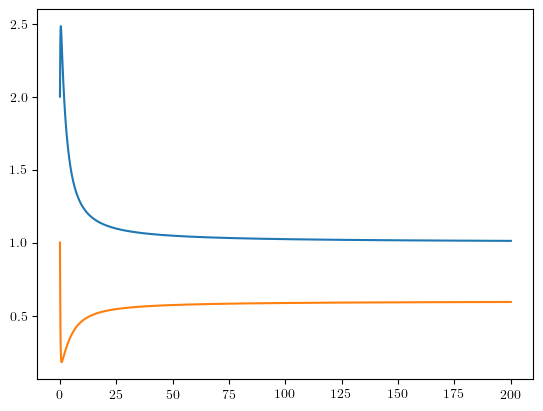

In [78]:
plt.plot(t, y[:,0])
plt.plot(t, y[:,1])
plt.show()

In [79]:
U_fix_1 = 2*B/(A + np.sqrt(A**2 - 4*B**2))
W_fix_1 = (A + np.sqrt(A**2 - 4*B**2))/2

U_fix_2 = 2*B/(A - np.sqrt(A**2 - 4*B**2))
W_fix_2 = (A - np.sqrt(A**2 - 4*B**2))/2

In [80]:
print(f"Fixed point 1: (U* = {U_fix_1:.1f}, W* = {W_fix_1:.1f}) \n")
print(f"Fixed point 2: (U* = {U_fix_2:.1f}, W* = {W_fix_2:.1f})")

Fixed point 1: (U* = 1.0, W* = 0.6) 

Fixed point 2: (U* = 1.0, W* = 0.6)


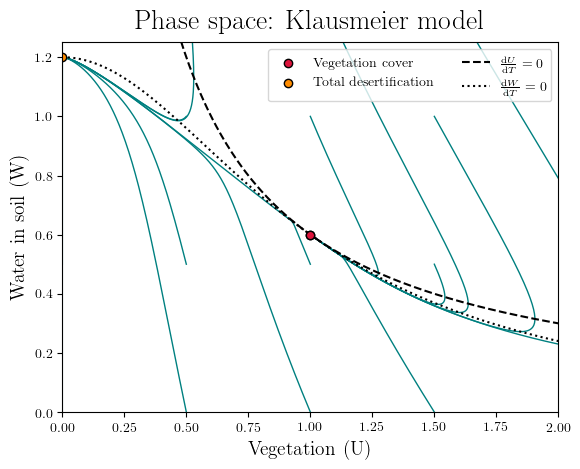

In [91]:
for i in range(4):
    for j in range(4):
        y0 = np.array([0.5*i, 0.5*j])
        y = odeint(klausmeier, y0, t, args = (A, B))
        
        plt.plot(y[:,0], y[:,1], lw = 1, color = 'teal', zorder = 0)

plt.scatter([U_fix_1, U_fix_2], [W_fix_1, W_fix_2], edgecolor = 'black',
           facecolor = 'crimson', zorder = 2, label = 'Vegetation cover')
plt.scatter(0, A, edgecolor = 'black', facecolor = 'darkorange', zorder = 2,
            label = 'Total desertification')
plt.xlim(0, 2)
plt.ylim(0, 1.25)
plt.xlabel('Vegetation (U)', fontsize = 14)
plt.ylabel('Water in soil (W)', fontsize = 14)

x = np.linspace(0, 2, 500)
plt.plot(x, B/x, lw = 1.5, ls = '--', color = 'black', label = r'$\frac{\mathrm{d} U}{\mathrm{d} T} = 0$',
        zorder = 1)
plt.plot(x, A/(1 + x**2), lw = 1.5, ls = 'dotted', color = 'black',
        label = r'$\frac{\mathrm{d} W}{\mathrm{d} T} = 0$', zorder = 1)

plt.title('Phase space: Klausmeier model', fontsize = 20, pad = 10)
plt.legend(loc = 'upper right', ncol = 2)
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1041.05it/s]


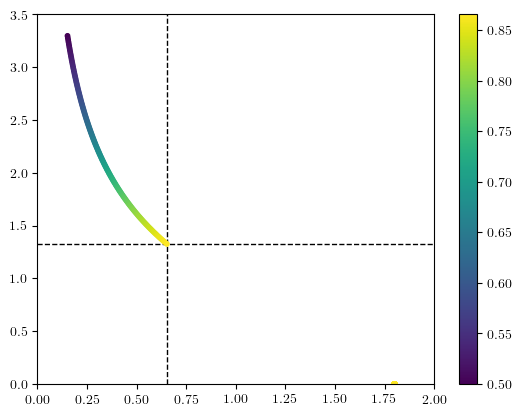

In [167]:
bb = np.linspace(0.5, 3, 1000)

final_U = []
final_W = []

for i in tqdm(range(len(bb))):
        y0 = np.array([1, 0.5])
        t = np.linspace(0, 500, 10000)
        y = odeint(klausmeier, y0, t, args = (1.8, bb[i]))
        
        if y[-1,0] < 1e-8:
            final_U.append(0)
            final_W.append(y[-1,1])
        else:
            final_U.append(y[-1,0])
            final_W.append(y[-1,1])
        
plt.axhline(final_U[np.where(np.array(final_U) == 0)[0][0]-1],
           lw = 1, ls = '--', color = 'black', zorder = 0)
plt.axvline(final_W[np.where(np.array(final_U) == 0)[0][0]-1],
           lw = 1, ls = '--', color = 'black', zorder = 0)

# plt.plot(final_W, final_U, zorder = 0, ls = '--', lw = 1)
scat = plt.scatter(final_W, final_U, c = bb, s = 10, zorder = 1,
                   vmax = bb[np.where(np.array(final_U) == 0)[0][0]-1],
                  cmap = 'viridis')
plt.colorbar(scat)

plt.ylim(0, 3.5)
plt.xlim(0, 2)
plt.show()

In [159]:
bb[np.where(np.array(final_U) == 0)[0][0]-1]

0.5975975975975976